In [4]:
import pandas as pd

df = pd.read_csv('CSVs/descripcion_2a29.csv', encoding='utf-8',)

# Convertir la columna fecha_publicacion a tipo datetime
df['fecha_publicacion'] = pd.to_datetime(df['fecha_publicacion'])

df['fecha_publicacion'] = df['fecha_publicacion'].dt.date

# Reemplazar NaN en la columna 'descripcion' con la cadena "procesados"
#df['descripcion'].fillna("PROCESADOS NO DEVUELTOS", inplace=True)

# Contar la cantidad de errores por fecha
error_count_by_date = df.groupby(['fecha_publicacion', 'descripcion']).sum().unstack(fill_value=0).reset_index()

# Agregar una columna que indique la suma de los errores por fecha
error_count_by_date['TOTAL_PUBLICADOS'] = error_count_by_date.iloc[:, 1:].sum(axis=1)

error_percentages = error_count_by_date.copy()
for col in error_percentages.columns[1:-1]:
    error_percentages[col] = (error_percentages[col] / error_percentages['TOTAL_PUBLICADOS']) * 100


error_percentages

fecha_publicacion       folio_recepcion                     \
descripcion                   COTIZ < LIQ DE SUELDO FALTA COTIZ. SALUD   
0                  2023-11-20             32.604833          11.657329   
1                  2023-11-21             22.053341          15.208748   
2                  2023-11-22             30.104839          11.779733   
3                  2023-11-23             11.363662           8.181625   
4                  2023-11-24              9.473685           4.210524   
5                  2023-11-27             31.567937          13.559032   
6                  2023-11-28             35.294207           9.718494   
7                  2023-11-29              9.000041           2.999829   

                                                                            \
descripcion FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL   
0                                                     0.364301               
1                                                     0.000000               
2                                                     0.000000               
3                                                     0.000000               
4                                                     0.000000               
5                                                     0.211865               
6                                                     0.767266               
7                                                     0.000000               

                                                                \
descripcion NO HAY IMAGENES PARA DESCARGAR NO IMAGENES CON API   
0                                 3.642962            9.107492   
1                                 1.140692            4.943000   
2                                 3.141346            0.261782   
3                                 0.454546            0.000000   
4                                 1.578947            0.000000   
5                                 3.177951           11.440708   
6                                 4.603580            0.000000   
7                                 2.999912            0.000000   

                                                              \
descripcion NO PROCESADO MEDIPASS NO SE ENCUENTRA CODIGO AFP   
0                       39.708711                   0.364300   
1                       52.851935                   0.000000   
2                       50.523800                   0.000000   
3                       76.818339                   0.000000   
4                       81.052631                   0.000000   
5                       34.322178                   0.000000   
6                       40.153523                   0.255755   
7                       81.000206                   0.000000   

                                                                     \
descripcion NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS RENTA = TOPE   
0                                             0.000000     2.550074   
1                                             0.000000     3.802283   
2                                             0.000000     4.188501   
3                                             0.000000     3.181828   
4                                             0.000000     3.684213   
5                                             0.423705     5.296623   
6                                             0.000000     9.207175   
7                                             0.000000     4.000011   

            TOTAL_PUBLICADOS  
descripcion                   
0              1110781638199  
1               532122577322  
2               772893144955  
3               445123283443  
4               384425896798  
5               954990927645  
6               791105201619  
7               202328295048

In [5]:

# Mostrar el resultadodf
#error_percentages.set_index('date', inplace=True)



error_percentages.columns = ['date','COTIZ < LIQ DE SUELDO',
    'FALTA COTIZ. SALUD',
    'FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL', 
    'NO HAY IMAGENES PARA DESCARGAR',
    'NO IMAGENES CON API',
    'NO PROCESADO MEDIPASS',
    'NO SE ENCUENTRA CODIGO AFP',
    'NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS',
    'RENTA = TOPE',
    'TOTAL_errores']

error_percentages

,date,COTIZ < LIQ DE SUELDO,FALTA COTIZ. SALUD,FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL,NO HAY IMAGENES PARA DESCARGAR,NO IMAGENES CON API,NO PROCESADO MEDIPASS,NO SE ENCUENTRA CODIGO AFP,NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS,RENTA = TOPE,TOTAL_errores
0,2023-11-20,32.604833,11.657329,0.364301,3.642962,9.107492,39.708711,0.364300,0.000000,2.550074,1110781638199
1,2023-11-21,22.053341,15.208748,0.000000,1.140692,4.943000,52.851935,0.000000,0.000000,3.802283,532122577322
2,2023-11-22,30.104839,11.779733,0.000000,3.141346,0.261782,50.523800,0.000000,0.000000,4.188501,772893144955
3,2023-11-23,11.363662,8.181625,0.000000,0.454546,0.000000,76.818339,0.000000,0.000000,3.181828,445123283443
4,2023-11-24,9.473685,4.210524,0.000000,1.578947,0.000000,81.052631,0.000000,0.000000,3.684213,384425896798
5,2023-11-27,31.567937,13.559032,0.211865,3.177951,11.440708,34.322178,0.000000,0.423705,5.296623,954990927645
6,2023-11-28,35.294207,9.718494,0.767266,4.603580,0.000000,40.153523,0.255755,0.000000,9.207175,791105201619
7,2023-11-29,9.000041,2.999829,0.000000,2.999912,0.000000,81.000206,0.000000,0.000000,4.000011,202328295048


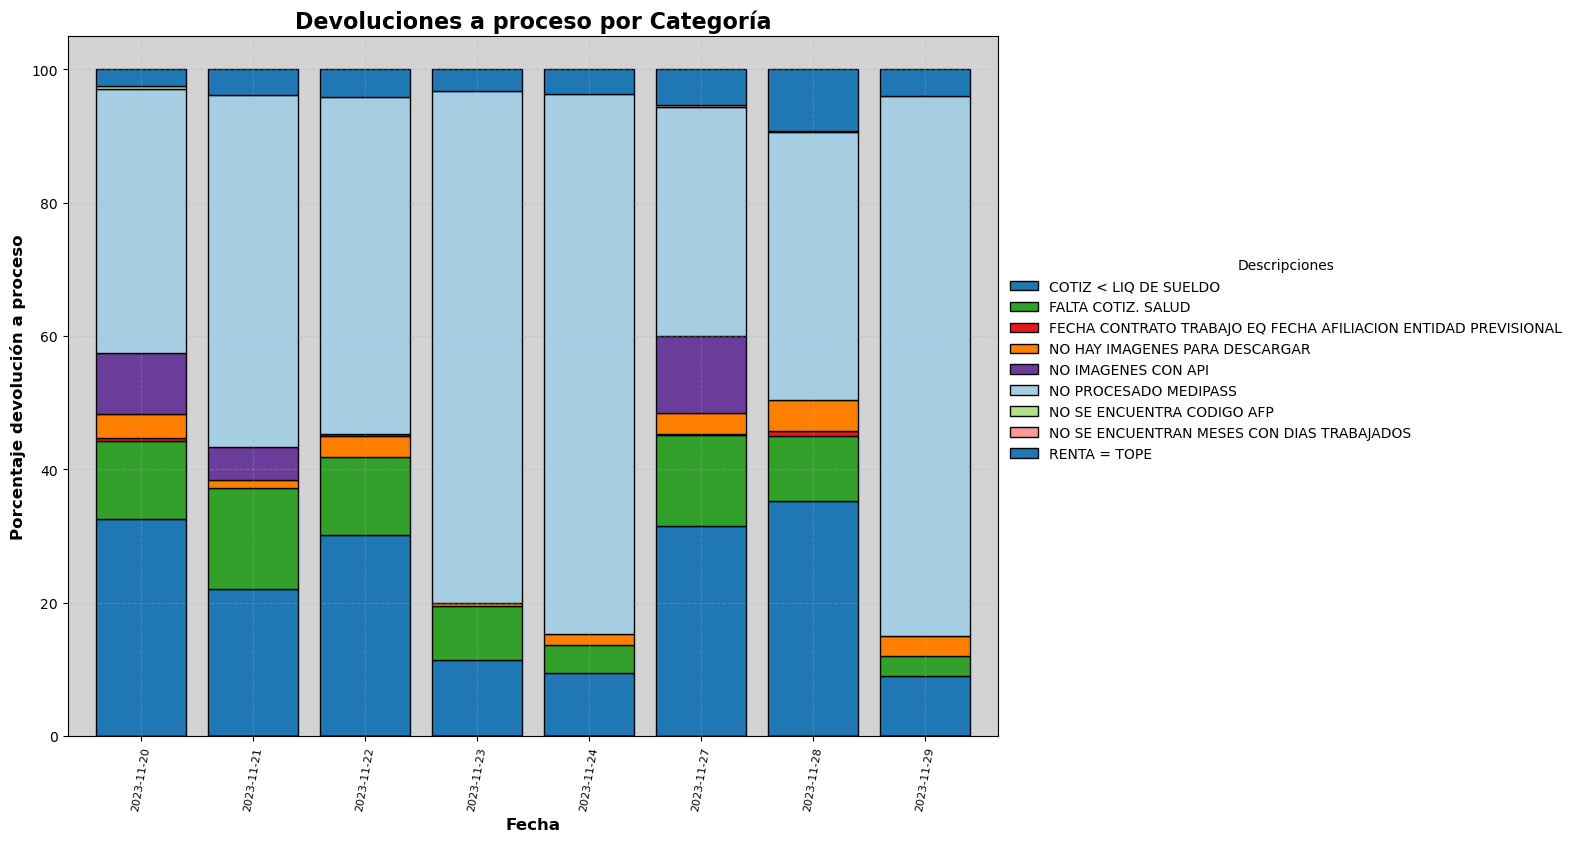

In [6]:
import matplotlib.pyplot as plt

from matplotlib.patches import PathPatch
from matplotlib.path import Path
#error_percentages['date'] = pd.to_datetime(error_percentages['date'])

columnas_grafica = ['date','COTIZ < LIQ DE SUELDO',
        'FALTA COTIZ. SALUD',
        'FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL', 
        'NO HAY IMAGENES PARA DESCARGAR',
        'NO IMAGENES CON API',
        'NO PROCESADO MEDIPASS',
        'NO SE ENCUENTRA CODIGO AFP',
        'NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS',
        'RENTA = TOPE']



colores_distintivos = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#a6cee3', '#b2df8a', '#fb9a99']

fig, ax = plt.subplots(figsize=(12, 8))

ax = error_percentages[columnas_grafica].plot(kind='bar', stacked=True, x='date',color=colores_distintivos, width=0.8, edgecolor='black',ax=ax)
plt.xlabel('Fecha', fontsize=12, fontweight='bold')
plt.ylabel('Porcentaje devolución a proceso', fontsize=12, fontweight='bold')
plt.title('Devoluciones a proceso por Categoría', fontsize=16, fontweight='bold')
plt.legend(title='Descripciones', bbox_to_anchor=(1, 0.7), loc='upper left', ncol=1, fontsize=10, frameon=False )

plt.grid(True, linestyle='--', alpha=0.3)
ax.set_facecolor('lightgray')
plt.xticks(range(len(error_percentages['date'])), error_percentages['date'], rotation=80)

# Ajustar el espacio ocupado por la sección de barras
plt.subplots_adjust(bottom=0.005)

plt.tick_params(axis='x', labelsize=8)

plt.show()

Este no duncion... Todavia


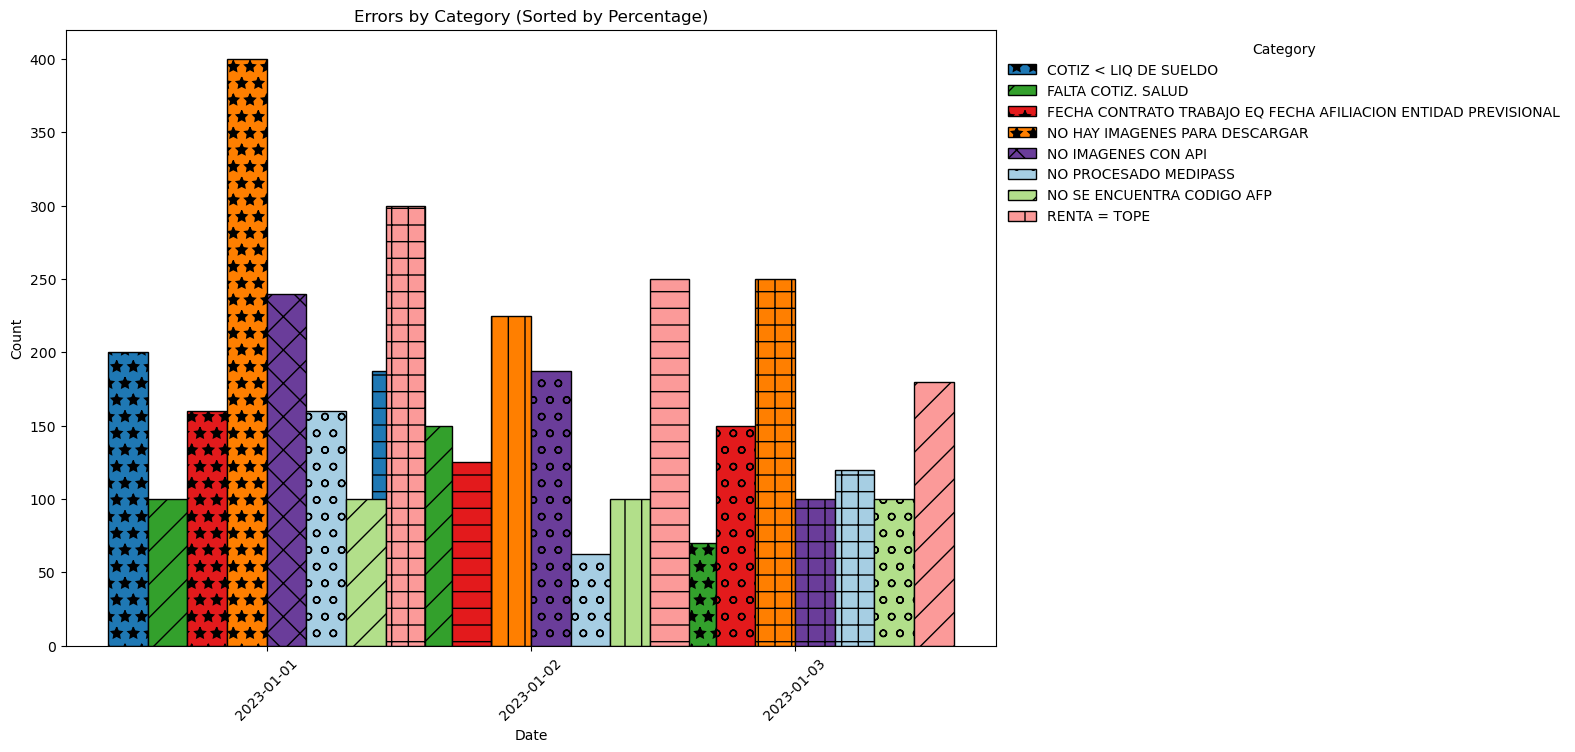

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Tu DataFrame
data = {'date': ['2023-01-01', '2023-01-02', '2023-01-03'],
        'COTIZ < LIQ DE SUELDO': [10, 15, 8],
        'FALTA COTIZ. SALUD': [5, 12, 7],
        'FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL': [8, 10, 15],
        'NO HAY IMAGENES PARA DESCARGAR': [20, 18, 25],
        'NO IMAGENES CON API': [12, 15, 10],
        'NO PROCESADO MEDIPASS': [8, 5, 12],
        'NO SE ENCUENTRA CODIGO AFP': [5, 8, 10],
        'RENTA = TOPE': [15, 20, 18],
        'TOTAL_errores': [5, 8, 10]}

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])

# Calcular porcentajes solo para columnas numéricas
columnas_numericas = df.select_dtypes(include=['number']).columns
porcentajes_errores = df[columnas_numericas].div(df['TOTAL_errores'], axis=0) * 100

# Paleta de colores distintiva
colores_distintivos = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#a6cee3', '#b2df8a', '#fb9a99']

# Ajustar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Graficar barras agrupadas con la paleta de colores distintivos y patrones
ax = porcentajes_errores.plot(kind='bar', stacked=True, color=colores_distintivos, edgecolor='black', width=0.7)

# Asignar patrones diferentes a cada categoría
patrones_colores = ['/', '\\', '|', '-', '+', 'x', 'o', '*']
for i, (colname, hatch) in enumerate(zip(porcentajes_errores.columns, patrones_colores)):
    for bar in ax.patches[i::len(porcentajes_errores.columns)]:
        bar.set_hatch(hatch)

# Cambiar el tamaño de las etiquetas del eje x
plt.xticks(range(len(df['date'])), df['date'].dt.strftime('%Y-%m-%d'), rotation=45, fontsize=10)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Errors by Category (Sorted by Percentage)')
plt.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left', ncol=1, fontsize=10, frameon=False)

plt.show()

